<a href="https://colab.research.google.com/github/GustavoLSantos/LearningMachineLearning/blob/main/WillISellMyCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [4]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

#This algorithm will predict if your car will or will not be sold

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
a_change = {
    'no' : 0,
    'yes' : 1
}
data.sold = data.sold.str.strip()
data.sold = data.sold.map(a_change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [7]:
from datetime import datetime

current_year = datetime.today().year

data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [8]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [9]:
data = data.drop(columns = ["Unnamed: 0", "mileage_per_year", "model_year"], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [10]:
x = data[['price', 'model_age', 'km_per_year']]
y = data['sold']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 100
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We'll train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy rate is %.2f%%" % accuracy)


We'll train with 7500 elements and test with 2500 elements
The accuracy rate is 59.64%


In [12]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(train_x, train_y)
dummy_predictions = dummy.predict(test_x)
accuracy = dummy.score(test_x,test_y) *100
print("The accuracy rate is %.2f%%" % accuracy)

The accuracy rate is 58.00%


In [13]:
#All above is for the LinearSVC

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We'll train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = DecisionTreeClassifier(max_depth=2)
model.fit(raw_train_x, train_y)
predictions = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy rate is %.2f%%" % accuracy)


We'll train with 7500 elements and test with 2500 elements
The accuracy rate is 76.84%


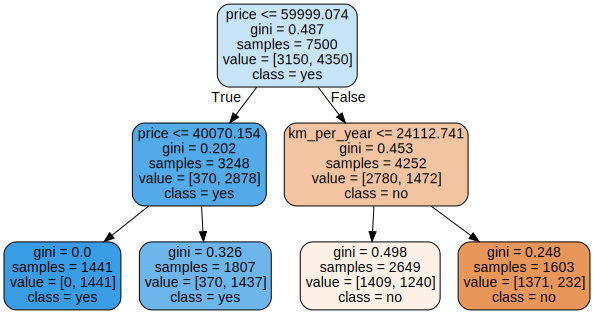

In [28]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True,
                           rounded = True,
                           feature_names = features,
                           class_names = ["no", "yes"])
chart = graphviz.Source(dot_data)
chart